In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import time

In [2]:
X = np.genfromtxt('handwritten_digits_images.csv', delimiter=',')
print("X.shape: " + str(X.shape))
y = np.genfromtxt('handwritten_digits_labels.csv', delimiter=',')
print("y.shape: " + str(y.shape))
# normalize the data
X /= 255

X.shape: (70000, 784)
y.shape: (70000,)


In [3]:
# train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=17)

Fit on training data with 3 hidden layers of size 40

In [4]:
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40, 40, 40), random_state=17)
start = time.time()
model.fit(X_train,y_train)
end = time.time()
print("Fitting time: %.1f seconds" % (end-start))

Fitting time: 53.2 seconds


In [5]:
print("Accuracy: %.4f" % model.score(X_test, y_test))

Accuracy: 0.9680


Find the number of dims needed to keep 91% of the explained variance

In [6]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
new_dims = np.argmax(cumsum >= 0.91) + 1
print("n_components chosen: " + str(new_dims))

n_components chosen: 96


Transform the data to 96 dims

In [7]:
pca = PCA(n_components=new_dims)
X_train_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_train_reduced)
X_test_reduced = pca.transform(X_test)
print("X_train_reduced.shape: " + str(X_train_reduced.shape))

X_train_reduced.shape: (63000, 96)


Visualization of the PCA-compressed data

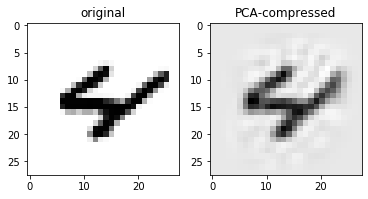

In [8]:
f = plt.figure()
f.add_subplot(1,2, 1)
plt.title("original")
plt.imshow(X_train[0].reshape((28,28)), cmap='Greys')
f.add_subplot(1,2, 2)

plt.title("PCA-compressed")
plt.imshow(X_recovered[0].reshape((28,28)), cmap='Greys')
plt.show(block=True)

Fit on reduced training data with 3 hidden layers of size 70

In [9]:
model_red = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(70, 70, 70), random_state=17)
start = time.time()
model_red.fit(X_train_reduced,y_train)
end = time.time()
print("Fitting time: %.1f seconds" % (end-start))

Fitting time: 19.5 seconds


In [10]:
print("Accuracy: %.4f" % model_red.score(X_test_reduced, y_test))

Accuracy: 0.9753
